In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('SampleSuperstore.csv')

In [3]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<AxesSubplot:>

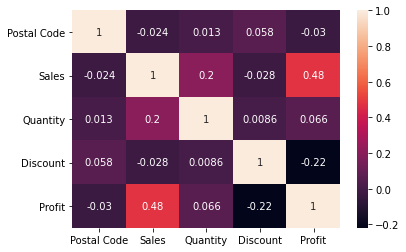

In [4]:
sns.heatmap(dataset.corr(),annot=True)

In [31]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
state_array = np.unique(dataset['State'])

In [6]:
profit = []
for i in state_array:
    p = np.sum(dataset[dataset.State==i].Profit)
    profit.append(p)

In [7]:
new_data = np.vstack((state_array,profit)).T

In [8]:
df = pd.DataFrame(data = new_data,columns=["State","Profits"])

In [9]:
df.head()

,State,Profits
0,Alabama,5786.83
1,Arizona,-3427.92
2,Arkansas,4008.69
3,California,76381.4
4,Colorado,-6527.86


In [10]:
print("The maximum loss from a State is",-1*np.min(df.Profits))

The maximum loss from a State is 25729.3563


In [11]:
df[df.Profits==np.max(df.Profits)].State

3    California
Name: State, dtype: object

In [12]:
df[df.Profits==np.min(df.Profits)].State

41    Texas
Name: State, dtype: object

In [13]:
city_array = np.unique(dataset['City'])

In [14]:
profit_city = []
for i in city_array:
    p = np.sum(dataset[dataset.City==i].Profit)
    profit_city.append(p)

In [15]:
new_data_city = np.vstack((city_array,profit_city)).T

In [16]:
df_city = pd.DataFrame(data = new_data_city,columns=["City","Profits"])

In [17]:
df_city.head()

,City,Profits
0,Aberdeen,6.63
1,Abilene,-3.7584
2,Akron,-186.636
3,Albuquerque,634.088
4,Alexandria,318.618


In [18]:
print("The maximum profit from a City is",np.max(df_city.Profits))

The maximum profit from a City is 62036.9837


In [19]:
df_city[df_city.Profits==np.max(df_city.Profits)].City

329    New York City
Name: City, dtype: object

In [20]:
print("The maximum loss from a City is",-1*np.min(df_city.Profits))

The maximum loss from a City is 13837.767399999999


In [21]:
df_city[df_city.Profits==np.min(df_city.Profits)].City

374    Philadelphia
Name: City, dtype: object

## Exploratory Data Analysis

<h3> i) State-wise analysis </h3>

<AxesSubplot:title={'center':'Counts of profits and losses of States'}>

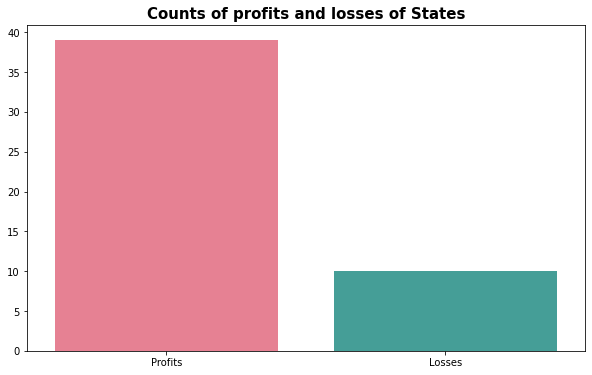

In [22]:
profit_num = np.sum(df.Profits>0)
loss_num = np.sum(df.Profits<0)
plt.figure(figsize=(10,6))
plt.title('Counts of profits and losses of States',fontsize=15,fontweight="bold")
sns.barplot(x = ["Profits","Losses"],y = [profit_num,loss_num],palette="husl")

<h3> There are more states with profits than with losses which is a good sign </h3>

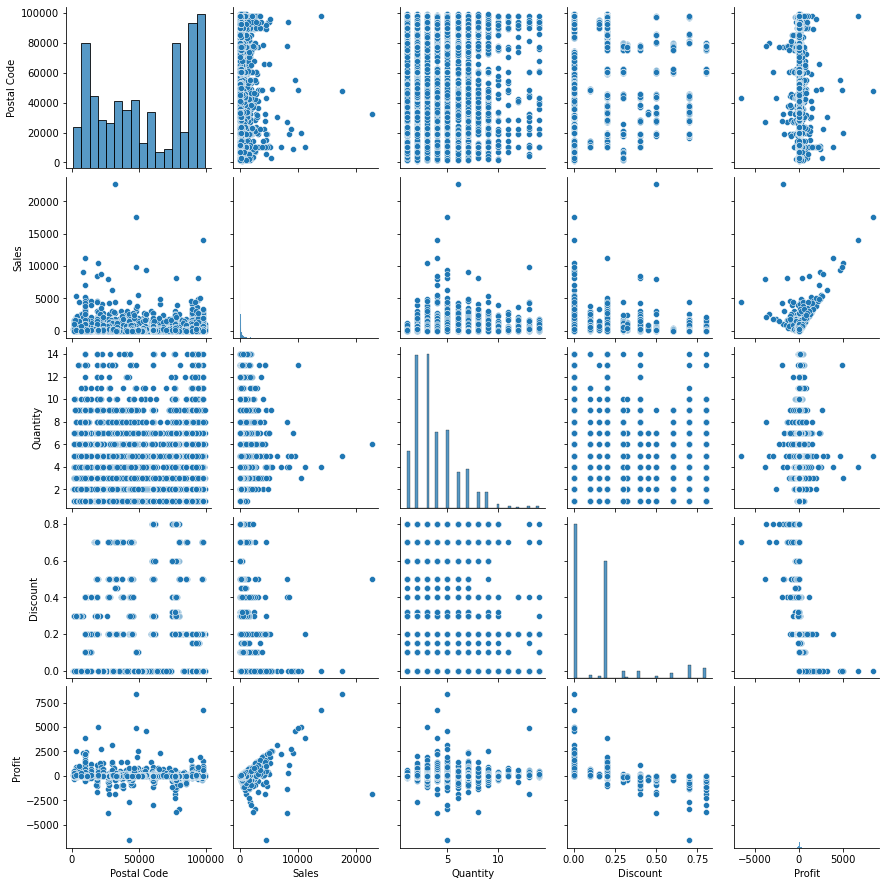

In [33]:
sns.pairplot(dataset,palette="Set2")

<AxesSubplot:title={'center':'Profits v/s State'}, xlabel='Profits', ylabel='State'>

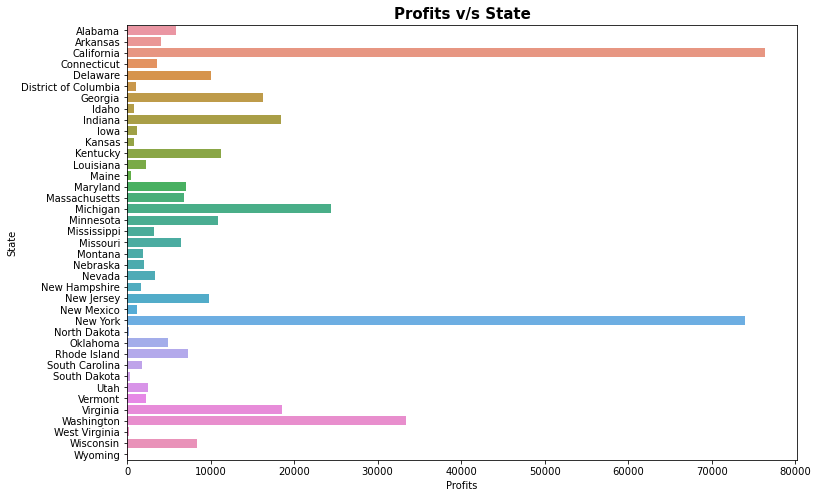

In [23]:
plt.figure(figsize=(12,8))
plt.title('Profits v/s State',fontsize=15,fontweight="bold")
sns.barplot(x = df[df.Profits>0].Profits,y = df[df.Profits>0].State)

The profit from New York is 76381.3871


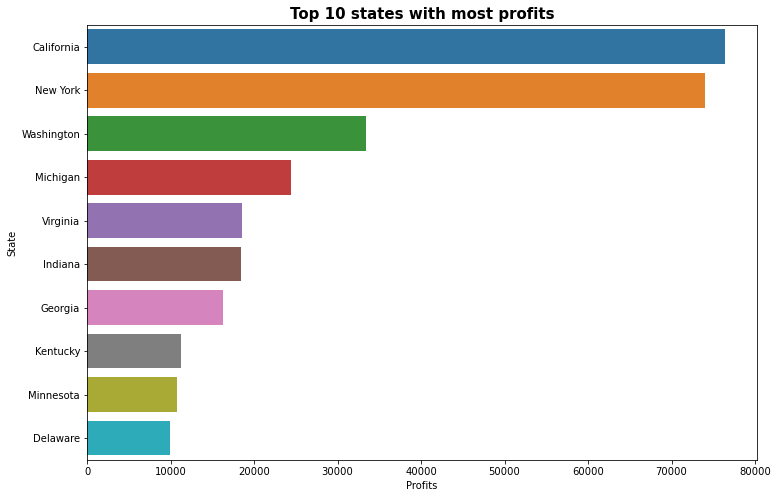

In [24]:
plt.figure(figsize=(12,8))
plt.title('Top 10 states with most profits',fontsize=15,fontweight="bold")
sns.barplot(y = df['State'][df[df.Profits>0].Profits.sort_values(ascending=False).head(10).index],x = df[df.Profits>0].Profits.sort_values(ascending=False).head(10))
print("The profit from New York is",np.max(df.Profits))

<h3> From the above plot it is clear that California and New York states have the highest profits </h3>

<AxesSubplot:title={'center':'Losses v/s State'}, xlabel='State', ylabel='Profits'>

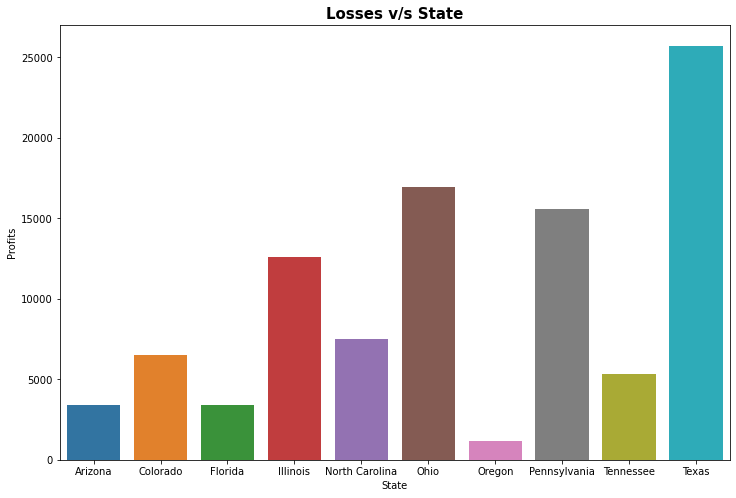

In [25]:
plt.figure(figsize=(12,8))
plt.title('Losses v/s State',fontsize=15,fontweight="bold")
sns.barplot(y = -1*df[df.Profits < 0].Profits,x = df[df.Profits < 0].State)

The maximum loss which is from Texas is 25729.3563


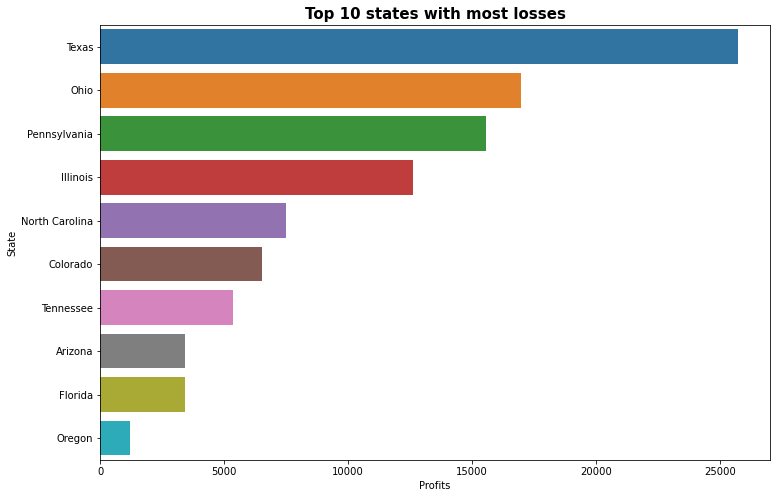

In [26]:
plt.figure(figsize=(12,8))
plt.title('Top 10 states with most losses',fontsize=15,fontweight="bold")
sns.barplot(y = df['State'][df[df.Profits<0].Profits.sort_values().head(10).index],x = -1*df[df.Profits<0].Profits.sort_values().head(10))
print("The maximum loss which is from Texas is",-1*np.min(df.Profits))

<h3> There were 10 states which were in loss and the state which suffered the highest loss was Texas </h3>

<h3> ii) City-wise analysis </h3>

<AxesSubplot:title={'center':'Counts of profits and losses of Cities'}>

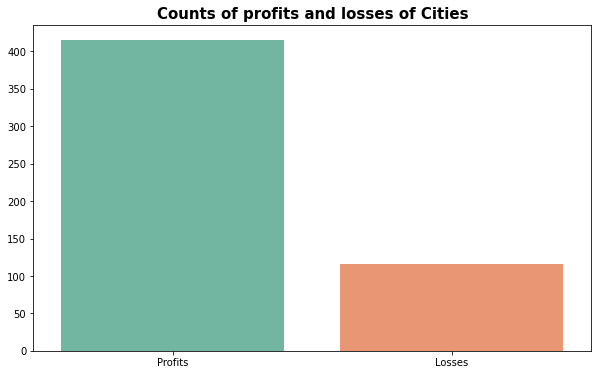

In [27]:
profit_num_city = np.sum(df_city.Profits>0)
loss_num_city = np.sum(df_city.Profits<0)
plt.figure(figsize=(10,6))
plt.title('Counts of profits and losses of Cities',fontsize=15,fontweight="bold")
sns.barplot(x = ["Profits","Losses"],y = [profit_num_city,loss_num_city],palette="Set2")

<AxesSubplot:title={'center':'Top 10 cities with most profits'}, xlabel='Profits', ylabel='City'>

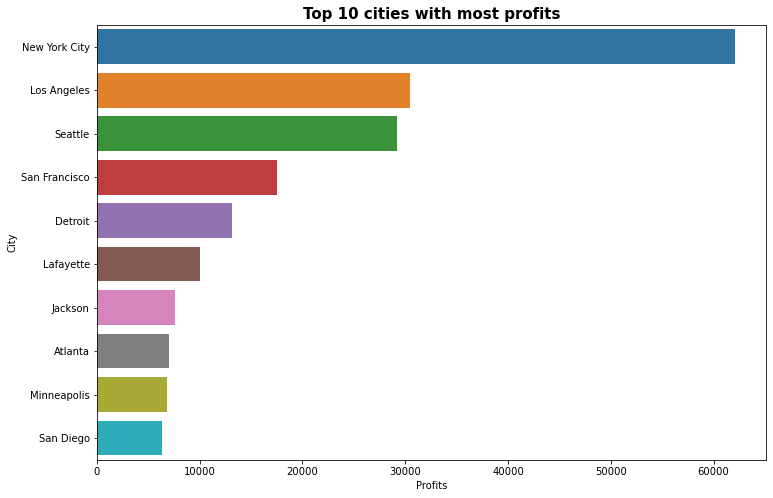

In [28]:
plt.figure(figsize=(12,8))
plt.title('Top 10 cities with most profits',fontsize=15,fontweight="bold")
sns.barplot(y = df_city['City'][df_city[df_city.Profits>0].Profits.sort_values(ascending=False).head(10).index],x = df_city[df_city.Profits>0].Profits.sort_values(ascending=False).head(10))

<AxesSubplot:title={'center':'Top 10 cities with most losses'}, xlabel='Profits', ylabel='City'>

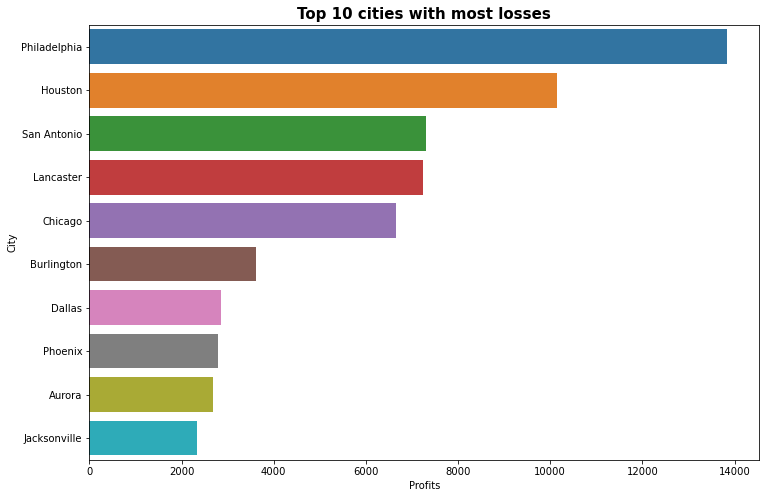

In [29]:
plt.figure(figsize=(12,8))
plt.title('Top 10 cities with most losses',fontsize=15,fontweight="bold")
sns.barplot(y = df_city['City'][df_city[df_city.Profits<0].Profits.sort_values().head(10).index],x = -1*df_city[df_city.Profits<0].Profits.sort_values().head(10))

<h3> From the above plots, it is clear that Texas state and Philadelphia city are suffering the highest losses. </h3>

<h3> iii) Category wise Analysis </h3> 

<AxesSubplot:ylabel='Profit'>

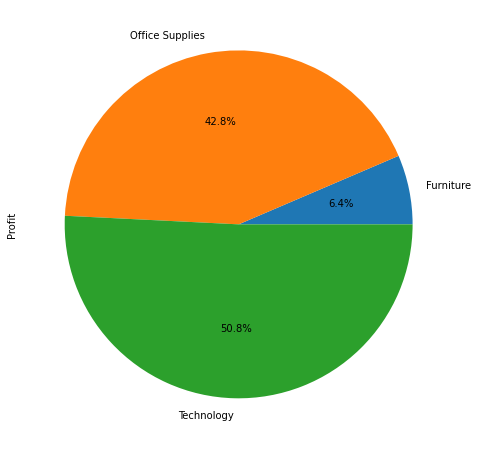

In [38]:
df = dataset.groupby("Category")["Profit"].sum()
plt.figure(figsize=(12,8))
df.plot.pie(autopct = "%.1f%%")

<h3> iv) Region wise analysis </h3>

<ipython-input-43-b1d272fac2aa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rw = dataset.groupby('Region')['Profit','Sales'].sum()


<AxesSubplot:xlabel='Region'>

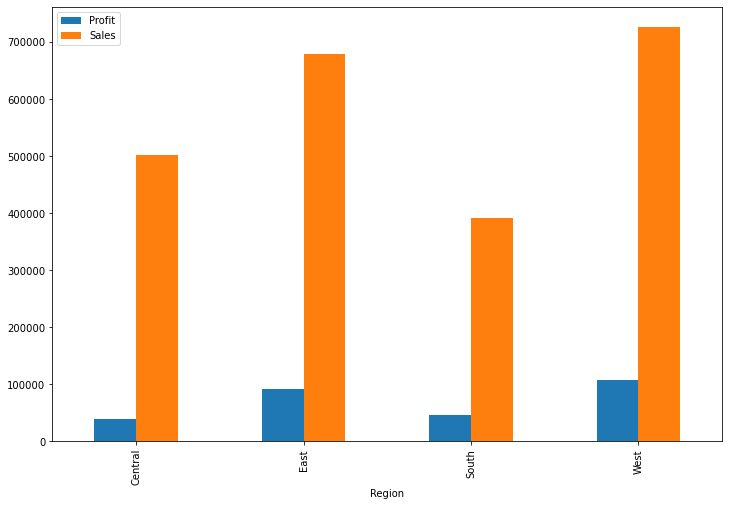

In [43]:
rw = dataset.groupby('Region')['Profit','Sales'].sum()
rw.plot.bar(figsize=(12,8))